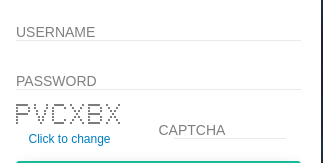

In [ ]:
from selenium import webdriver
import time


dataset = {'     *       *      *      *      *      ******* ': 'J',
           '*******      *      *      *      *      *      *': 'L',
           '********  *  **  *  **  *  **  *  **  *  * ** ** ': 'B',
           '*       *       *       ****  *     *     *      ': 'Y',
           '*      *      *      ********      *      *      ': 'T',
           ' ***** *     **     **     **     **     * *   * ': 'C',
           '********  *  **  *  **  *  **     **     **     *': 'E',
           '********     **     **     **     **     * ***** ': 'D',
           '*     **     **     *********     **     **     *': 'I',
           ' ***** *     **     **     **     **     * ***** ': 'O',
           '******* *       *       *     *     *     *******': 'M',
           '******* *       *       *       *       * *******': 'N',
           '********  *   *  *   *  *   *      *      *      ': 'F',
           ' **  * *  *  **  *  **  *  **  *  **  *  * *  ** ': 'S',
           ' ***** *     **     **     **   * **    *  **** *': 'Q',
           '*******   *     * *    * *   *   *  *   * *     *': 'K',
           '     **   **   ** *  *   *   ** *     **       **': 'A',
           '******       *      *      *      *      ******* ': 'U',
           '*******   *      *      *      *      *   *******': 'H',
           '**       **       **       *    **   **   **     ': 'V',
           '*     **    ***   * **  *  ** *   ***    **     *': 'Z',
           '********  *   *  *   *  *   *  *   *  *    **    ': 'P',
           '*     * *   *   * *     *     * *   *   * *     *': 'X',
           ' ***** *     **     **     **   * **   * * *  ** ': 'G',
           '********  *   *  *   *  *   *  **  *  * *  **   *': 'R',
           '*******     *     *     *       *       * *******': 'W'}


def group_captcha_string(word_pos):
    captcha_string = ''
    for i in range(len(word_pos[0])):
        temp_list = []
        temp_string = ''

        for j in range(len(word_pos)):
            val = word_pos[j][i]
            temp_string += val

            if val.strip():
                temp_list.append(val)

        if temp_list:
            captcha_string += temp_string
        else:
            captcha_string += 'sp'

    return captcha_string.split("spsp")


# create client
client = webdriver.Chrome()
client.get("http://keith-wood.name/realPerson.html")
time.sleep(3)

# indexing text
_get = lambda _in: {index: val for index, val in enumerate(_in)}

# get text from html tag
captcha = client.find_element_by_css_selector('form [class="realperson-text"]').text.split('\n')

word_pos = list(map(_get, captcha))

# group text
text = group_captcha_string(word_pos)

# get text(test)
captcha_text = ''.join(list(map(lambda x: dataset[x] if x else '', text)))
print("captcha:", captcha_text)

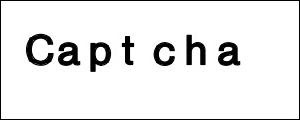

In [ ]:
import pytesseract
import sys
import argparse
try:
    import Image
except ImportError:
    from PIL import Image
from subprocess import check_output


def resolve(path):
    print("Resampling the Image")
    check_output(['convert', path, '-resample', '600', path])
    return pytesseract.image_to_string(Image.open(path))


if __name__=="__main__":
    argparser = argparse.ArgumentParser()
    argparser.add_argument('path', help = 'Captcha file path')
    args = argparser.parse_args()
    path = args.path
    print('Resolving Captcha')
    captcha_text = resolve(path)
    print('Extracted Text', captcha_text)




# command to run script
python3 captcha_resolver.py cap.jpg